In [1]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 
from keras.layers import Reshape
import tensorflow as tf



from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [3]:
images = []
for root, dirnames, filenames in os.walk("Dataset/Train_images/"):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="L")
        images.append(image)

In [4]:
print (images[0].shape)


(496, 64)


In [5]:
labels = np.load('train_labels.npy')
labels_list = []
for i in range(len(labels)):
    labels_list.append(labels[i])

In [6]:
labels_list[0].shape

(496, 64, 8)

In [7]:
print (len(labels_list))
print (type(labels_list[0]))

images=np.array(images)
print(images.shape[0])
images = images.reshape(images.shape[0],496,64,1)

#Increased the Size of training data
print(images[0].shape)
train_indices = np.random.choice(770,700,replace = False)
print(sorted(train_indices))
train_images = []
train_labels = [] 
for i in train_indices:
    train_images.append(images[i])
    train_labels.append(labels_list[i])

test_indices = [x for x in range(770) if x not in train_indices]
print(test_indices)
test_images = []
test_labels = []
#Corrected the varaible name
for i in test_indices:
    test_images.append(images[i])
    test_labels.append(labels_list[i])

770
<type 'numpy.ndarray'>
770
(496, 64, 1)
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 203, 204, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 228, 229, 230, 231

In [8]:
print (len(train_images))
print (len(train_labels))
print (np.array(train_labels).shape)

700
700
(700, 496, 64, 8)


In [9]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [10]:
type(train_images)

numpy.ndarray

In [11]:
mean = np.mean(train_images,axis=(0,1,2,3))
std = np.std(train_images,axis=(0,1,2,3))
train_images = (train_images-mean)/(std+1e-7)
test_images = (test_images-mean)/(std+1e-7)

In [12]:
train_labels = np.array(train_labels)
train_labels.shape

(700, 496, 64, 8)

In [13]:
test_labels = np.array(test_labels)
test_labels.shape

(70, 496, 64, 8)

In [14]:
data_shape = 496*64

In [15]:
#Modified the train labels shape
train_labels = np.reshape(train_labels,(700,data_shape,8))
train_labels.shape

(700, 31744, 8)

In [16]:
#Modified the testing labels shape
test_labels = np.reshape(test_labels,(70,data_shape,8))
test_labels.shape

(70, 31744, 8)

In [10]:
arg_1 = tf.placeholder(tf.float32,shape=(None,248,32,64))
index_mask_1 = tf.placeholder(tf.bool,shape=(None,496,64,64))

arg_2 = tf.placeholder(tf.float32,shape=(None,124,16,64))
index_mask_2 = tf.placeholder(tf.bool,shape=(None,248,32,64))

arg_3 = tf.placeholder(tf.float32,shape=(None,62,8,64))
index_mask_3 = tf.placeholder(tf.bool,shape=(None,124,16,64))

In [11]:
def maxpool_1(x):
    print(type(x))
    print(x.shape)
    y = x[0,:,:,:]
    t = K.argmax(y)
    print(type(t))
    print(t.shape)
    print(type(y))
    print(y.shape)
    outputs = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    arg_1=tf.cast(outputs[1],tf.float32)
    upsampled_output=UpSampling2D(size=(2,2))(outputs[0])
    print(upsampled_output.dtype)
    print(arg_1.dtype)
    index_mask_1=K.tf.equal(x,upsampled_output)
    print((arg_1.shape))
    return outputs[0]

def maxpool_2(x):
    print(type(x))
    print(x.shape)
    y = x[0,:,:,:]
    t = K.argmax(y)
    print(type(t))
    print(t.shape)
    print(type(y))
    print(y.shape)
    outputs = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    arg_2=tf.cast(outputs[1],tf.float32)
    upsampled_output=UpSampling2D(size=(2,2))(outputs[0])
    print(upsampled_output.dtype)
    print(arg_2.dtype)
    index_mask_2=K.tf.equal(x,upsampled_output)
    print((arg_2.shape))
    return outputs[0]

def maxpool_3(x):
    print(type(x))
    print(x.shape)
    y = x[0,:,:,:]
    t = K.argmax(y)
    print(type(t))
    print(t.shape)
    print(type(y))
    print(y.shape)
    outputs = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    arg_3=tf.cast(outputs[1],tf.float32)
    upsampled_output=UpSampling2D(size=(2,2))(outputs[0])
    print(upsampled_output.dtype)
    print(arg_3.dtype)
    index_mask_3=K.tf.equal(x,upsampled_output)
    print((arg_3.shape))
    return outputs[0]

def shape(x):
    shape = list(x)
    shape[1]= shape[1]//2
    shape[2]= None
    return tuple(shape)

In [12]:
print((arg_1.shape))

(?, 248, 32, 64)


In [13]:
def unpool_1(input):
    mask_shape = index_mask_1.get_shape().as_list()
    input_shape = input.get_shape().as_list()
    pool_size = (mask_shape[1] / input_shape[1], None)
    on_success = UpSampling2D(size=(2,2))(input)
    on_fail = K.zeros_like(on_success)
    print()
    return K.tf.where(index_mask_1, on_success, on_fail)

def unpool_2(input):
    mask_shape= index_mask_2.get_shape().as_list()
    input_shape = input.get_shape().as_list()
    pool_size = (mask_shape[1] / input_shape[1], None)
    on_success = UpSampling2D(size=(2,2))(input)
    on_fail = K.zeros_like(on_success)
    print()
    return K.tf.where(index_mask_2, on_success, on_fail)

def unpool_3(input):
    mask_shape = index_mask_3.get_shape().as_list()
    input_shape = input.get_shape().as_list()
    pool_size = (mask_shape[1] / input_shape[1], None)
    on_success = UpSampling2D(size=(2,2))(input)
    on_fail = K.zeros_like(on_success)
    print()
    return K.tf.where(index_mask_3, on_success, on_fail)

In [14]:
def unpool_shape(x):
    shape = list(x)
    shape[1]= shape[1]*2
    shape[2]= None
    return tuple(shape)

In [17]:
big_filter = True

In [19]:

if big_filter :
    # Defines the input tensor
    inputs = Input(shape=(496,64,1))

    L1 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(inputs)
    L2 = BatchNormalization()(L1)
    #L3 = Lambda(maxpool_1,output_shape = shape)(L2)
    L3 = MaxPooling2D(pool_size=(2,2))(L2)
    L4 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L3)
    L5 = BatchNormalization()(L4)

    #L6 = Lambda(maxpool_2,output_shape = shape)(L5)
    L6 = MaxPooling2D(pool_size=(2,2))(L5)
    L7 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L6)
    L8 = BatchNormalization()(L7)
    #L9 = Lambda(maxpool_3,output_shape = shape)(L8)
    L9 = MaxPooling2D(pool_size=(2,2))(L8)
    L10 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L9)
    L11 = BatchNormalization()(L10)
    L12 = UpSampling2D(size = (2,2))(L11)
    #L12 = Lambda(unpool_3,output_shape = unpool_shape)(L11)
    L13 = Concatenate(axis = 3)([L8,L12])
    L14 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L13)
    L15 = BatchNormalization()(L14)
    L16 = UpSampling2D(size= (2,2))(L15)
    #L16 = Lambda(unpool_2,output_shape=unpool_shape)(L15)
    L17 = Concatenate(axis = 3)([L16,L5])
    L18 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L17)
    L19 = BatchNormalization()(L18)
    #L20 = Lambda(unpool_1,output_shape=unpool_shape)(L19)
    L20 = UpSampling2D(size=(2,2),name = "Layer19")(L19)
    L21 = Concatenate(axis=3)([L20,L2])
    L22 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L21)
    L23 = BatchNormalization()(L22)
    L24 = Conv2D(8,kernel_size=(1,1),padding = "same")(L23)
    L25 = Reshape((data_shape,8),input_shape = (496,64,8))(L24)
    L26 = Activation('softmax')(L25)


    model = Model(inputs = inputs, outputs = L26)
    model.summary()
else :
     # Defines the input tensor
    inputs = Input(shape=(496,64,1))

    L1 = Conv2D(64,kernel_size=(5,3),activation = 'relu',padding = "same")(inputs)
    L2 = BatchNormalization()(L1)
    #L3 = Lambda(maxpool_1,output_shape = shape)(L2)
    L3 = MaxPooling2D(pool_size=(2,2))(L2)
    L4 = Conv2D(64,kernel_size=(5,3),activation = 'relu',padding = "same")(L3)
    L5 = BatchNormalization()(L4)

    #L6 = Lambda(maxpool_2,output_shape = shape)(L5)
    L6 = MaxPooling2D(pool_size=(2,2))(L5)
    L7 = Conv2D(64,kernel_size=(5,3),activation = 'relu',padding = "same")(L6)
    L8 = BatchNormalization()(L7)
    #L9 = Lambda(maxpool_3,output_shape = shape)(L8)
    L9 = MaxPooling2D(pool_size=(2,2))(L8)
    L10 = Conv2D(64,kernel_size=(5,3),activation = 'relu',padding = "same")(L9)
    L11 = BatchNormalization()(L10)
    L12 = UpSampling2D(size = (2,2))(L11)
    #L12 = Lambda(unpool_3,output_shape = unpool_shape)(L11)
    L13 = Concatenate(axis = 3)([L8,L12])
    L14 = Conv2D(64,kernel_size=(5,3),activation = 'relu',padding = "same")(L13)
    L15 = BatchNormalization()(L14)
    L16 = UpSampling2D(size= (2,2))(L15)
    #L16 = Lambda(unpool_2,output_shape=unpool_shape)(L15)
    L17 = Concatenate(axis = 3)([L16,L5])
    L18 = Conv2D(64,kernel_size=(5,3),activation = 'relu',padding = "same")(L17)
    L19 = BatchNormalization()(L18)
    #L20 = Lambda(unpool_1,output_shape=unpool_shape)(L19)
    L20 = UpSampling2D(size=(2,2),name = "Layer19")(L19)
    L21 = Concatenate(axis=3)([L20,L2])
    L22 = Conv2D(64,kernel_size=(5,3),activation = 'relu',padding = "same")(L21)
    L23 = BatchNormalization()(L22)
    L24 = Conv2D(8,kernel_size=(1,1),padding = "same")(L23)
    L25 = Reshape((data_shape,8),input_shape = (496,64,8))(L24)
    L26 = Activation('softmax')(L25)


    model = Model(inputs = inputs, outputs = L26)
    model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 496, 64, 1)    0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 496, 64, 64)   1408        input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 496, 64, 64)   256         conv2d_1[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 248, 32, 64)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [20]:
class_weighting = [1.0,80.0000,80.00000000,80.00000000,80.0000,80.000,80.00,80.00]

In [21]:
smooth = 1

In [21]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [22]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [24]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',dice_coef])

In [25]:
data_augmentation = True

In [30]:
if data_augmentation :
    print("-------------Using Data augmentation------------")
     # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    
    datagen.fit(train_images)
    model.fit_generator(datagen.flow(train_images, train_labels, batch_size=16),
                        steps_per_epoch=train_images.shape[0] // 16,
                        epochs=10,verbose=1,validation_data=(test_images,test_labels))
else :
    model.fit(train_images,train_labels,batch_size=16,epochs=10,validation_data=(test_images,test_labels),class_weight=class_weighting)

-------------Using Data augmentation------------
Epoch 1/10
43/43 [==============================] - 1280s - loss: 1.7776 - acc: 0.6868 - dice_coef: 0.3264 - val_loss: 1.3433 - val_acc: 0.7940 - val_dice_coef: 0.3046
Epoch 2/10
43/43 [==============================] - 1237s - loss: 1.2953 - acc: 0.7634 - dice_coef: 0.4228 - val_loss: 0.8412 - val_acc: 0.8081 - val_dice_coef: 0.6041
Epoch 3/10
43/43 [==============================] - 1241s - loss: 0.9406 - acc: 0.8063 - dice_coef: 0.5809 - val_loss: 0.7798 - val_acc: 0.8081 - val_dice_coef: 0.7176
Epoch 4/10
43/43 [==============================] - 1238s - loss: 0.8166 - acc: 0.8102 - dice_coef: 0.6449 - val_loss: 0.7772 - val_acc: 0.8081 - val_dice_coef: 0.7576
Epoch 5/10
43/43 [==============================] - 1233s - loss: 0.7979 - acc: 0.8046 - dice_coef: 0.6798 - val_loss: 0.7297 - val_acc: 0.8081 - val_dice_coef: 0.7257
Epoch 6/10
43/43 [==============================] - 1233s - loss: 0.7449 - acc: 0.8120 - dice_coef: 0.6879 - va

In [28]:
train_images_2=np.array(train_images)
train_labels_2=np.array(train_labels)
model.fit(train_images,train_labels,batch_size=16,epochs=10,validation_data=(test_images,test_labels),class_weight=class_weighting)

Train on 500 samples, validate on 270 samples
Epoch 1/10
500/500 [==============================] - 1410s - loss: -0.7345 - acc: 0.7492 - dice_coef: 0.7345 - val_loss: -0.6857 - val_acc: 0.6905 - val_dice_coef: 0.6857
Epoch 2/10
 32/500 [>.............................] - ETA: 1085s - loss: -0.7743 - acc: 0.7813 - dice_coef: 0.7743

KeyboardInterrupt: 

In [11]:
model.save_weights("weights.h5")

In [55]:
testing_image = ndimage.imread('Dataset/testing_image_4.png',mode = 'L')

In [56]:
testing_image = np.array(testing_image)
print(testing_image.shape[0])

496


In [57]:
testing_image = testing_image.reshape(1,496,64,1)

In [58]:
prediction = model.predict(testing_image)

In [59]:
print(prediction.shape)

(1, 496, 64, 8)


In [60]:
prediction = np.squeeze(prediction,axis = 0)

In [61]:
print(prediction.shape)


(496, 64, 8)


In [62]:
print (prediction)

[[[  9.90431845e-01   5.23849914e-04   2.38480396e-03 ...,   3.14290333e-03
     7.15359987e-04   9.47752633e-05]
  [  9.95876908e-01   1.26564744e-04   5.17529435e-04 ...,   2.05338211e-03
     3.22114036e-04   4.62890821e-05]
  [  9.91709769e-01   3.47106252e-04   1.40436867e-03 ...,   3.52300471e-03
     4.66498459e-04   1.45449289e-04]
  ..., 
  [  9.93215978e-01   2.89540971e-04   1.14223047e-03 ...,   2.86238850e-03
     4.15960822e-04   1.21896235e-04]
  [  9.94165242e-01   1.88748279e-04   9.98849748e-04 ...,   2.88870698e-03
     5.12290921e-04   5.69161930e-05]
  [  9.77184176e-01   1.62097695e-03   5.97098330e-03 ...,   8.09637923e-03
     1.31334132e-03   5.07012708e-04]]

 [[  9.90255058e-01   3.38861166e-04   1.74046448e-03 ...,   4.34618024e-03
     1.35297398e-03   1.18468612e-04]
  [  9.95023370e-01   1.01163852e-04   3.01213498e-04 ...,   2.36597634e-03
     9.77306976e-04   7.58161477e-05]
  [  9.88762558e-01   4.33083362e-04   1.21312588e-03 ...,   5.10587031e-03
  

In [63]:
print(prediction[260][45])

[ 0.18668322  0.02075981  0.07049716  0.08813264  0.0905104   0.37279558
  0.11087015  0.059751  ]


In [64]:
s = [1,2,3,4]
print(np.argmax(s))

3


In [65]:
print(prediction.shape)

(496, 64, 8)


In [66]:
output = np.zeros((496,64))

In [67]:
for i in range(496):
    for j in range(64):
        index = np.argmax(prediction[i][j])
        output[i][j] = index

In [68]:
print (output.shape)

(496, 64)


In [69]:
color= np.zeros((496,64,3))

In [70]:
for j in range(496):
    for k in range(64):
        if(output[j][k]==0):
            color[j][k] = [0,0,0]
        if(output[j][k]==1):
            color[j][k] = [128,0,0]
        if(output[j][k]==2):
            color[j][k] = [0,128,0]
        if(output[j][k]==3):
            color[j][k] = [128,128,0] 
        if(output[j][k]==4):
            color[j][k] = [0,128,128]
        if(output[j][k]==5):
            color[j][k] = [64,0,0]
        if(output[j][k]==6):
            color[j][k] = [192,0,0]
        if(output[j][k]==7):
            color[j][k] = [64,128,0]

In [71]:
plt.imshow(color)

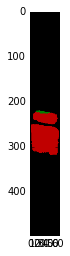

In [72]:
plt.show()